In [18]:
import pandas as pd
import gspread as gs
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
df=pd.read_excel('playoffs_stat_player.xlsx',index_col=None)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,6,1,167,25,52,0.481,...,0.600,8,21,29,6,1,5,9,14,61
1,Steven Adams,C,28,MEM,7,5,114,9,21,0.429,...,0.545,15,30,45,15,1,1,4,12,24
2,Bam Adebayo,C,24,MIA,18,18,614,104,175,0.594,...,0.763,37,107,144,48,18,13,38,55,266
3,Nickeil Alexander-Walker,SG,23,UTA,1,0,5,2,2,1.000,...,1.000,0,1,1,1,1,0,0,0,5
4,Grayson Allen,SG,26,MIL,12,5,305,37,82,0.451,...,0.636,5,30,35,15,8,4,9,22,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Ziaire Williams,SF,20,MEM,10,1,168,23,52,0.442,...,0.923,4,12,16,5,5,0,2,14,69
213,Delon Wright,SG,29,ATL,5,0,137,15,29,0.517,...,0.667,11,13,24,14,4,1,5,2,41
214,Thaddeus Young,PF,33,TOR,6,0,87,9,18,0.500,...,0.250,7,11,18,10,5,1,3,8,20
215,Trae Young,PG,23,ATL,5,5,186,22,69,0.319,...,0.788,5,20,25,30,3,0,31,13,77


In [3]:
#remove rows with NaN
df = df.dropna().sort_values("PTS",ascending=False).reset_index(drop=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Jayson Tatum,SF,23,BOS,24,24,983,201,472,0.426,...,0.800,24,137,161,148,29,21,100,72,615
1,Stephen Curry,PG,33,GSW,22,18,764,202,440,0.459,...,0.829,11,104,115,129,29,8,57,59,602
2,Jaylen Brown,SF,25,BOS,24,24,920,197,419,0.470,...,0.763,33,133,166,85,27,10,74,71,554
3,Luka Dončić,PG,22,DAL,15,15,552,160,352,0.455,...,0.770,10,137,147,96,27,9,59,44,475
4,Jimmy Butler,SF,32,MIA,17,17,629,166,328,0.506,...,0.841,41,84,125,78,35,11,25,25,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Jarrett Culver,SG,22,MEM,3,0,22,3,10,0.300,...,0.500,2,5,7,1,2,0,2,4,7
157,Sam Hauser,SF,24,BOS,7,0,15,1,4,0.250,...,1.000,0,1,1,2,0,0,0,0,5
158,George Hill,SG,35,MIL,5,0,76,1,5,0.200,...,1.000,1,5,6,3,0,0,1,10,5
159,Jordan Nwora,SF,23,MIL,8,0,20,2,9,0.222,...,0.000,0,3,3,2,0,0,0,0,4


In [4]:
df['PTS/G'] = df['PTS']/df['G']
df = df.sort_values('PTS/G',ascending=False).round(2).reset_index(drop=1)
df.loc[0:30]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
0,Luka Dončić,PG,22,DAL,15,15,552,160,352,0.46,...,10,137,147,96,27,9,59,44,475,31.67
1,Giannis Antetokounmpo,PF,27,MIL,12,12,448,140,285,0.49,...,26,144,170,81,8,15,54,43,380,31.67
2,Nikola Jokić,C,26,DEN,5,5,171,61,106,0.57,...,17,49,66,29,8,5,24,20,155,31.00
3,Jimmy Butler,SF,32,MIA,17,17,629,166,328,0.51,...,41,84,125,78,35,11,25,25,466,27.41
4,Stephen Curry,PG,33,GSW,22,18,764,202,440,0.46,...,11,104,115,129,29,8,57,59,602,27.36
5,Ja Morant,PG,22,MEM,9,9,338,81,184,0.44,...,13,59,72,88,18,4,32,22,244,27.11
6,Brandon Ingram,SF,24,NOP,6,6,236,56,118,0.48,...,4,33,37,37,4,2,23,11,162,27.00
7,Kevin Durant,PF,33,BRK,4,4,176,32,83,0.39,...,2,21,23,25,4,1,21,15,105,26.25
8,Jayson Tatum,SF,23,BOS,24,24,983,201,472,0.43,...,24,137,161,148,29,21,100,72,615,25.62
9,Donovan Mitchell,SG,25,UTA,6,6,229,53,133,0.40,...,6,20,26,34,4,3,16,14,153,25.50


In [5]:
df.index[df['Player']=="De'Andre Hunter"]

Int64Index([19], dtype='int64')

In [6]:
df.loc[19]

Player    De'Andre Hunter
Pos                    SF
Age                    24
Tm                    ATL
G                       5
GS                      5
MP                    175
FG                     39
FGA                    70
FG%                  0.56
3P                     12
3PA                    26
3P%                  0.46
2P                     27
2PA                    44
2P%                  0.61
eFG%                 0.64
FT                     16
FTA                    20
FT%                   0.8
ORB                     2
DRB                    17
TRB                    19
AST                     3
STL                     4
BLK                     1
TOV                    11
PF                     20
PTS                   106
PTS/G                21.2
Name: 19, dtype: object

In [7]:
df_leaders = df.loc[(df["PTS/G"]>10) & (df["MP"]>100)]

df_leaders.sort_values('eFG%',ascending=False).reset_index(drop=1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
0,Seth Curry,SG,31,BRK,4,4,132,22,39,0.56,...,2,8,10,12,1,3,3,15,58,14.50
1,Chris Boucher,PF,29,TOR,6,0,130,26,42,0.62,...,12,23,35,1,1,7,2,13,67,11.17
2,Bruce Brown,SF,25,BRK,4,4,139,21,37,0.57,...,6,13,19,11,5,3,9,16,56,14.00
3,Deandre Ayton,C,23,PHO,13,13,397,105,164,0.64,...,33,83,116,22,5,10,19,34,233,17.92
4,Al Horford,C,35,BOS,23,23,815,101,193,0.52,...,35,179,214,76,19,31,29,64,277,12.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Jrue Holiday,PG,31,MIL,12,12,463,89,235,0.38,...,12,55,67,78,21,7,34,28,229,19.08
66,Dillon Brooks,SF,26,MEM,11,11,335,60,172,0.35,...,8,22,30,30,11,3,22,36,161,14.64
67,D'Angelo Russell,PG,25,MIN,6,6,196,24,72,0.33,...,0,15,15,40,9,0,17,17,72,12.00
68,DeMar DeRozan,PF,32,CHI,5,5,203,39,95,0.41,...,1,26,27,24,9,2,11,12,104,20.80


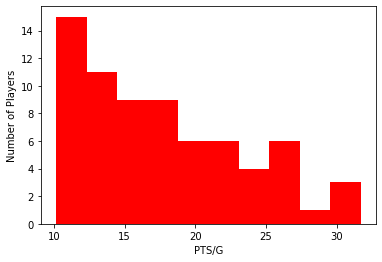

In [8]:
plt.hist(df_leaders['PTS/G'],color="r")

plt.ylabel('Number of Players')
plt.xlabel("PTS/G")
plt.show()

In [10]:
POS_gp= df.groupby(['Pos'])

In [13]:
POS_gp.get_group("C")

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
2,Nikola Jokić,C,26,DEN,5,5,171,61,106,0.57,...,17,49,66,29,8,5,24,20,155,31.00
11,Joel Embiid,C,27,PHI,10,10,385,78,161,0.48,...,21,86,107,21,4,8,32,34,236,23.60
16,Karl-Anthony Towns,C,26,MIN,6,6,222,39,80,0.49,...,11,54,65,13,4,12,27,25,131,21.83
22,Nikola Vučević,C,31,CHI,5,5,181,40,91,0.44,...,14,48,62,16,2,6,8,14,97,19.40
29,Deandre Ayton,C,23,PHO,13,13,397,105,164,0.64,...,33,83,116,22,5,10,19,34,233,17.92
40,Bam Adebayo,C,24,MIA,18,18,614,104,175,0.59,...,37,107,144,48,18,13,38,55,266,14.78
42,Jonas Valančiūnas,C,29,NOP,6,6,175,33,68,0.48,...,33,53,86,18,4,1,12,17,87,14.50
56,Al Horford,C,35,BOS,23,23,815,101,193,0.52,...,35,179,214,76,19,31,29,64,277,12.04
66,DeMarcus Cousins,C,31,DEN,5,0,57,19,29,0.66,...,3,14,17,6,3,1,7,9,53,10.60
68,Brook Lopez,C,33,MIL,12,12,332,50,102,0.49,...,27,44,71,8,6,18,11,33,127,10.58


In [36]:
POS_gp['Player'].count().loc["SF"]

30

In [42]:
POS_gp['Player'].apply(lambda x:x.str.contains('Green').sum())

Pos
C     1
PF    2
PG    0
SF    2
SG    1
Name: Player, dtype: int64

In [43]:
df.loc[df['Player'].str.contains('Green')]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
85,Danny Green,SF,34,PHI,12,12,319,36,89,0.40,...,9,28,37,10,12,4,13,23,103,8.58
93,Draymond Green,PF,31,GSW,22,22,703,69,144,0.48,...,26,133,159,138,25,22,59,87,176,8.00
124,JaMychal Green,PF,31,DEN,5,0,69,6,16,0.38,...,3,9,12,2,0,1,2,12,20,4.00
128,Jeff Green,C,35,DEN,5,5,113,6,17,0.35,...,7,11,18,2,3,2,2,6,19,3.80
151,Josh Green,SG,21,DAL,16,0,121,8,28,0.29,...,1,11,12,7,5,0,0,16,23,1.44
152,Javonte Green,SF,28,CHI,5,1,72,3,17,0.18,...,8,7,15,2,9,0,4,8,7,1.40


In [47]:
df = df.rename(columns={'PTS/G':'PTS per game'})

In [48]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS per game
0,Luka Dončić,PG,22,DAL,15,15,552,160,352,0.46,...,10,137,147,96,27,9,59,44,475,31.67
1,Giannis Antetokounmpo,PF,27,MIL,12,12,448,140,285,0.49,...,26,144,170,81,8,15,54,43,380,31.67
2,Nikola Jokić,C,26,DEN,5,5,171,61,106,0.57,...,17,49,66,29,8,5,24,20,155,31.00
3,Jimmy Butler,SF,32,MIA,17,17,629,166,328,0.51,...,41,84,125,78,35,11,25,25,466,27.41
4,Stephen Curry,PG,33,GSW,22,18,764,202,440,0.46,...,11,104,115,129,29,8,57,59,602,27.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,George Hill,SG,35,MIL,5,0,76,1,5,0.20,...,1,5,6,3,0,0,1,10,5,1.00
157,Aaron Nesmith,SF,22,BOS,15,0,52,4,17,0.24,...,4,11,15,3,2,4,1,6,12,0.80
158,Juan Toscano-Anderson,SF,28,GSW,14,0,49,4,10,0.40,...,0,10,10,8,2,1,8,3,11,0.79
159,Sam Hauser,SF,24,BOS,7,0,15,1,4,0.25,...,0,1,1,2,0,0,0,0,5,0.71


In [49]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PTS per game'],
      dtype='object')

In [50]:
# handling missing values

company = {
    "name":['Shopee','Apple','Amazon','Google',np.nan,'NA'],
    'year':[1,2,None,4,5,6]
}

In [51]:
df_temp = pd.DataFrame(company)

In [52]:
df_temp

,name,year
0,Shopee,1.0
1,Apple,2.0
2,Amazon,NaN
3,Google,4.0
4,NaN,5.0
5,NA,6.0


In [54]:
# df.dropna?

In [57]:
df_temp.replace(np.nan,0)

,name,year
0,Shopee,1.0
1,Apple,2.0
2,Amazon,0.0
3,Google,4.0
4,0,5.0
5,NA,6.0


In [62]:
df_temp.fillna('missing')

,name,year
0,Shopee,1.0
1,Apple,2.0
2,Amazon,missing
3,Google,4.0
4,missing,5.0
5,NA,6.0


In [63]:
df_temp.dtypes

name     object
year    float64
dtype: object

In [65]:
# Beautifulsoup lib
import requests
from bs4 import BeautifulSoup as bs

In [66]:
# Load the webpage content

# r = requests.get('https://www.google.com.hk')

# soup = bs(r.content)

# print(soup.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"/>
  <meta content="noodp" name="robots"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   Google
  </title>
  <script nonce="ksl8oEWn1cYsVAzJFCNKaA">
   (function(){window.google={kEI:'_CrNYuSWO7-v2roP7Zmx4Ao',kEXPI:'0,1302536,56873,6059,206,4804,2316,383,246,5,1354,4013,1123753,1197754,647,380089,16115,17444,11240,17572,4859,1361,9290,3025,17584,4020,978,13228,3847,10626,22737,5081,1593,1279,2742,149,1103,840,6297,3514,606,2023,1777,520,14670,3227,2845,7,17450,8101,8219,1851,15756,3,346,230,1014,1,5444,149,11323,2652,4,1528,2304,27348,1714,3050,2658,7355,13660,21223,5797